In [1]:
import numpy as np
import pandas as pd
#最大表示行数の指定（ここでは50行を指定）
pd.set_option('display.max_rows', 50)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import seaborn as sns
sns.set(font='Yu Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
def plot_confusion_matrix(test_y,pred_y,class_names,normalize=False, fontsize=32):
    cm = confusion_matrix(test_y,pred_y)
    # classes = class_names[unique_labels(test_y,pred_y)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=0)
    
    if len(class_names) <= 3:
        fig, ax = plt.subplots(figsize=(8, 4))
    else:
        fig, ax = plt.subplots(figsize=(16, 8))

    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=class_names,
           yticklabels=class_names,
           ylabel='True label\n',
           xlabel='\nPredicted label')
    fmt = '.2f' if normalize else 'd'
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j,
                    i,
                    format(cm[i, j], fmt),
                    ha="center",
                    va="center",
                    color="red", fontsize=fontsize)
    fig.tight_layout()
    return ax

In [3]:
def rename(kind, hold_position, name):
    if name == "安部":
        file_path = "pattern2/" + name + "分類_" + kind + "_" + hold_position + "_pattern2.npy"
#     elif name == "熊野" and kind == "validation":
#         file_path = "pattern" + pattern + "/val_" + hold_position + "_" + name + "分類.npy"
    else:
        file_path = "pattern2/" + kind + "_" + hold_position + "_" + name + "分類.npy"
    return file_path

In [4]:
def pattern2Concat(kind, hold_position, name):
    if kind == "train":
        label = np.load("../../Data/センサ別npyファイル/train/train_Bag/train_Bag_Label.npy")[:, 0].reshape([-1, 1])
        label = np.delete(label, 120845, 0)
        pattern_file = np.array([1] * label.shape[0]).reshape([-1, 1])
    else:
        label = np.load("../../Data/センサ別npyファイル/validation/validation_Bag/validation_Bag_Label.npy")[:, 0].reshape([-1, 1])
        pattern_file = np.load("validation_pattern2.npy")
        print("pattern2.npyのshape", pattern_file.shape)
    
    file_path = rename(kind, hold_position, name)
    
    print(name, np.load(file_path).shape)
    print(np.argmax(np.load(file_path), axis=1), np.argmax(np.load(file_path), axis=1).reshape([-1, 1]).shape)
    predict = np.argmax(np.load(file_path), axis=1).reshape([-1, 1])
    
    if kind == "train" and name == "安部":
        predict = np.delete(predict, 120845, 0)
    
#     if name != "熊野":
    predict += 1

    
    print(pattern_file.shape, label.shape, predict.shape, np.unique(predict))
    result = np.concatenate([pattern_file.reshape([-1, 1]), label, predict], axis=1).astype(np.int32)
    result = pd.DataFrame(result, columns=["pattern", "label", name + "predict"])
    return result

# すべての保持位置の評価データに対する結果を出す

In [5]:
hold_positions = ["Bag", "Hips", "Torso", "Hand"]

names = ["安部", "関口", "熊野", "横山"]
# names = ["安部", "関口", "熊野"]
patterns = []

for name in names:
    tmp = pattern2Concat("validation", hold_positions[0], name)
    for hold_position in hold_positions[1:]:
        tmp = pd.concat([tmp, pattern2Concat("validation", hold_position, name)], axis=0)
    print(name, tmp.shape)
    patterns.append(tmp)
    
patterns[0].shape

pattern2.npyのshape (28685,)
安部 (28685, 8)
[2 2 2 ... 3 3 6] (28685, 1)
(28685,) (28685, 1) (28685, 1) [1 2 3 4 5 6 7 8]
pattern2.npyのshape (28685,)
安部 (28685, 8)
[1 2 2 ... 5 3 6] (28685, 1)
(28685,) (28685, 1) (28685, 1) [1 2 3 4 5 6 7 8]
pattern2.npyのshape (28685,)
安部 (28685, 8)
[2 2 2 ... 6 4 4] (28685, 1)
(28685,) (28685, 1) (28685, 1) [1 2 3 4 5 6 7 8]
pattern2.npyのshape (28685,)
安部 (28685, 8)
[6 2 2 ... 5 4 0] (28685, 1)
(28685,) (28685, 1) (28685, 1) [1 2 3 4 5 6 7 8]
安部 (114740, 3)
pattern2.npyのshape (28685,)
関口 (28685, 8)
[3 3 2 ... 1 3 7] (28685, 1)
(28685,) (28685, 1) (28685, 1) [1 2 3 4 5 6 7 8]
pattern2.npyのshape (28685,)
関口 (28685, 8)
[1 3 2 ... 1 3 7] (28685, 1)
(28685,) (28685, 1) (28685, 1) [1 2 3 4 5 6 7 8]
pattern2.npyのshape (28685,)
関口 (28685, 8)
[3 3 2 ... 3 3 7] (28685, 1)
(28685,) (28685, 1) (28685, 1) [1 2 3 4 5 6 7 8]
pattern2.npyのshape (28685,)
関口 (28685, 8)
[3 1 2 ... 3 1 0] (28685, 1)
(28685,) (28685, 1) (28685, 1) [1 2 3 4 5 6 7 8]
関口 (114740, 3)
pattern2.n

(114740, 3)

安部 0.4796042475414227
関口 0.591157518675105
熊野 0.4366103667056306
横山 0.06635877897886099


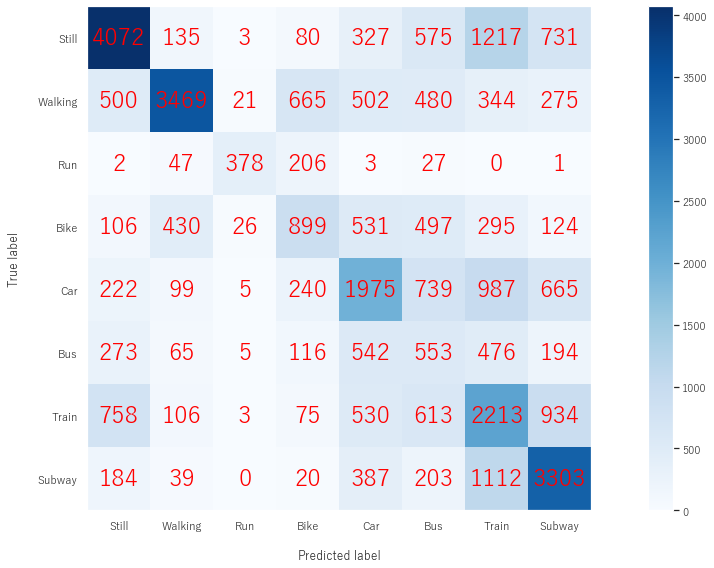

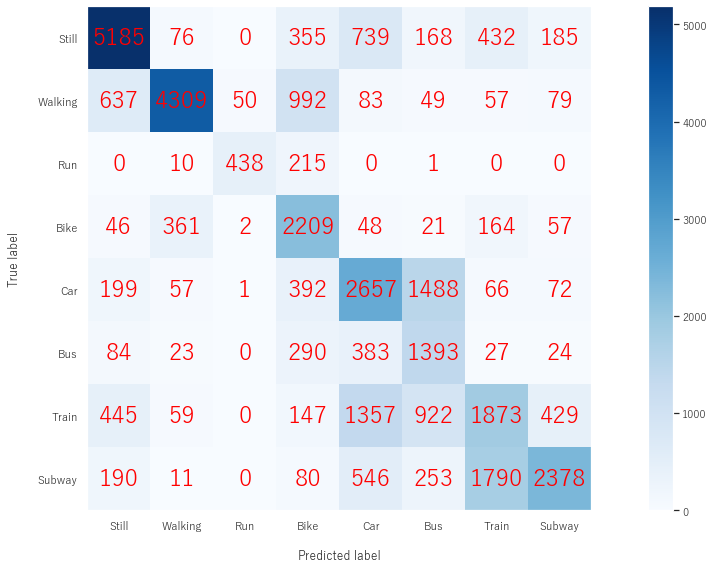

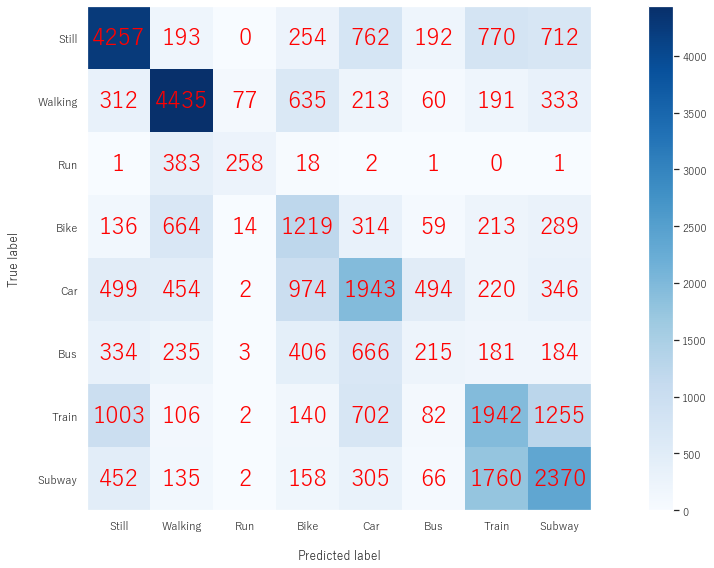

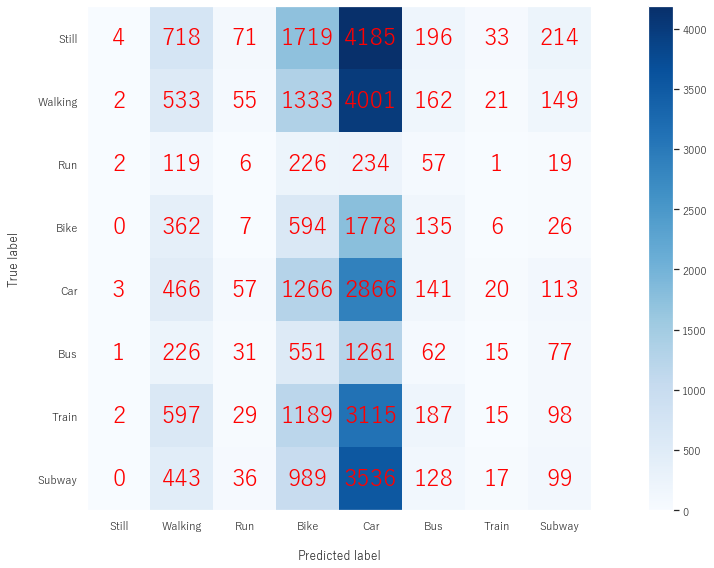

In [6]:
class_names = ["Still", "Walking", "Run", "Bike", "Car", "Bus", "Train", "Subway"]

for pattern, name in zip(patterns, names):
    plot_confusion_matrix(pattern[pattern['pattern'] == 2]['label'], pattern[pattern['pattern'] == 2][name + "predict"], class_names, normalize=False, fontsize=24)
    plt.grid(False)

    f1 = f1_score(pattern[pattern['pattern'] == 2]['label'], pattern[pattern['pattern'] == 2][name + "predict"], average="macro")
    print(name, f1)

# 保持位置ごと成績をチェック

In [7]:
names = ["安部", "関口", "横山", "熊野"]
# names = ["安部", "関口", "熊野"]
patterns = []

for name in names:
    patterns.append(pattern2Concat("validation", "Bag", name))


pattern2.npyのshape (28685,)
安部 (28685, 8)
[2 2 2 ... 3 3 6] (28685, 1)
(28685,) (28685, 1) (28685, 1) [1 2 3 4 5 6 7 8]
pattern2.npyのshape (28685,)
関口 (28685, 8)
[3 3 2 ... 1 3 7] (28685, 1)
(28685,) (28685, 1) (28685, 1) [1 2 3 4 5 6 7 8]
pattern2.npyのshape (28685,)
横山 (28685, 8)
[1 3 3 ... 1 3 4] (28685, 1)
(28685,) (28685, 1) (28685, 1) [1 2 3 4 5 6 7 8]
pattern2.npyのshape (28685,)
熊野 (28685, 8)
[1 2 2 ... 2 1 7] (28685, 1)
(28685,) (28685, 1) (28685, 1) [1 2 3 4 5 7 8]


安部 0.5197105517962723
関口 0.606230645584713
横山 0.07646822555559914
熊野 0.47129666449982577


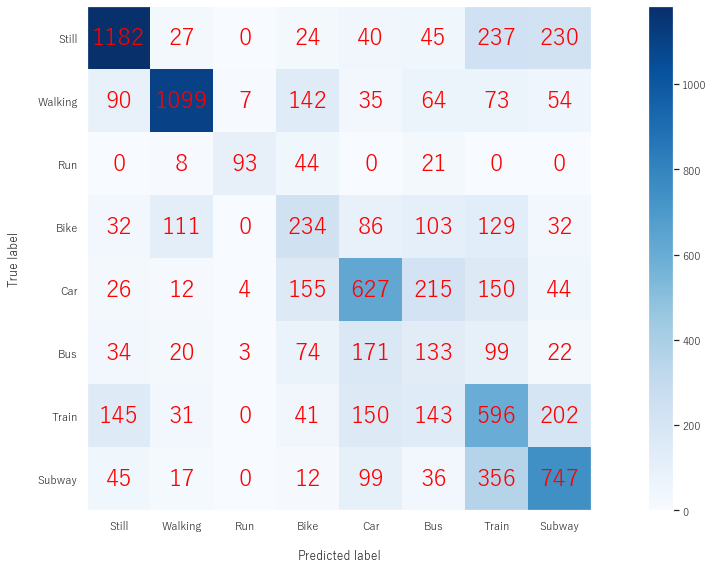

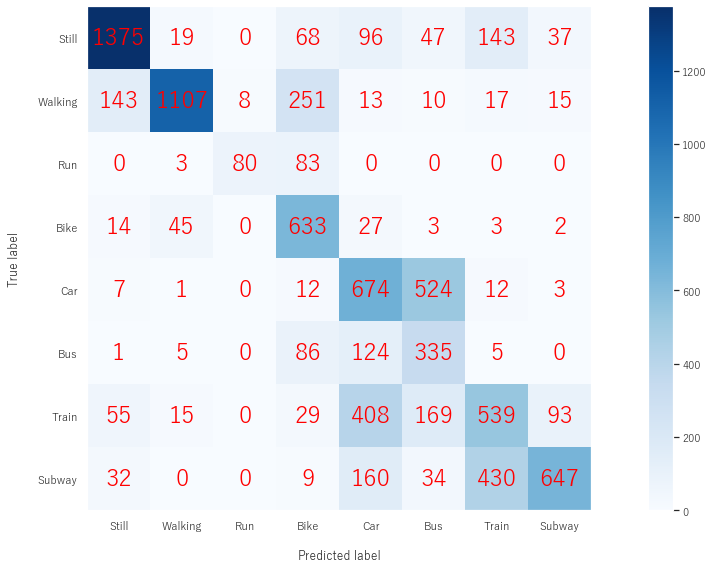

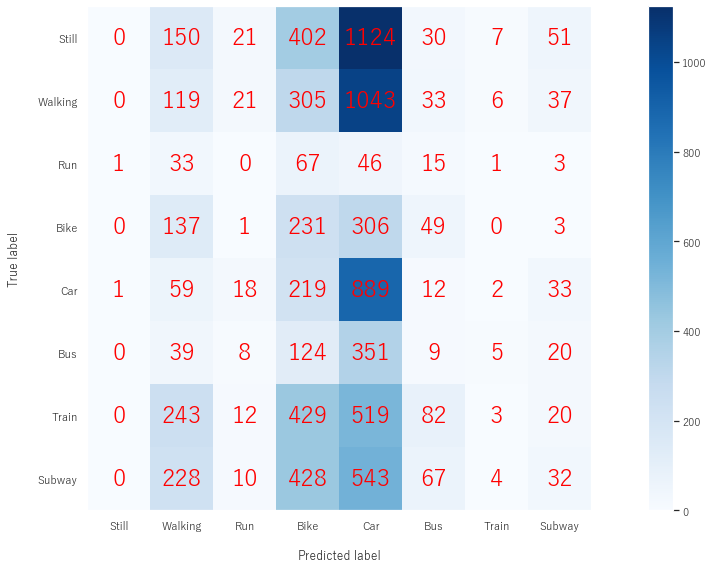

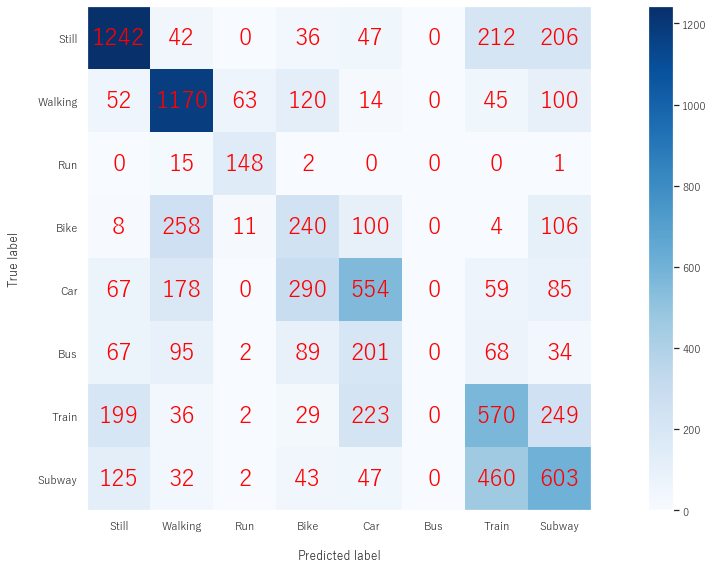

In [8]:
class_names = ["Still", "Walking", "Run", "Bike", "Car", "Bus", "Train", "Subway"]

for pattern, name in zip(patterns, names):
    plot_confusion_matrix(pattern[pattern['pattern'] == 2]['label'], pattern[pattern['pattern'] == 2][name + "predict"], class_names, normalize=False, fontsize=24)
    plt.grid(False)

    f1 = f1_score(pattern[pattern['pattern'] == 2]['label'], pattern[pattern['pattern'] == 2][name + "predict"], average="macro")
    print(name, f1)

# かんたんにロジスティック回帰で分類

In [5]:
from sklearn.linear_model import LogisticRegression

# パターン2の学習して良いデータの読み込み
## pattern == 1のやつってこと

In [7]:
def logisticX_pattern2(kind, names):
    x = []
    hold_positions = ["Bag", "Hips", "Torso", "Hand"]
    pattern_file = np.load("validation_pattern2.npy").reshape([-1])
        
    for hold_position in hold_positions:
        file_path = rename(kind, hold_position, names[0])
        xx = np.load(file_path).reshape([-1, 8])
        if (names[0] == "安部" or names[0] == "横山") and kind == "train":
            xx = np.delete(xx, 120845, 0)
        if kind == "validation":
            xx = xx[pattern_file == 1]
        for name in names[1:]:
            file_path = rename(kind, hold_position, name)
            tmp = np.load(file_path).reshape([-1, 8])
            if (name == "安部" or name == "横山") and kind == "train":
                tmp = np.delete(tmp, 120845, 0)
            if kind == "validation":
                tmp = tmp[pattern_file == 1]
            xx = np.concatenate([xx, tmp], axis=1)
            print(xx.shape)
        x.append(xx)
            
    x = np.array(x)
    x = x.reshape([-1, 8])
    return x

In [11]:
pattern_file = np.load("validation_pattern2.npy").reshape([-1])

x_train = logisticX_pattern2("train", names)
x_train = np.concatenate([x_train, logisticX_pattern2("validation", names)], axis=0)

y_train_tmp = np.delete(np.load("../../Data/センサ別npyファイル/train/train_Bag/train_Bag_Label.npy")[:, 0].reshape([-1, 1]), 120845, 0)
y_train = np.concatenate([y_train_tmp, y_train_tmp, y_train_tmp, y_train_tmp], axis=0)
y_train_tmp = np.load("../../Data/センサ別npyファイル/validation/validation_Bag/validation_Bag_Label.npy")[:, 0].reshape([-1, 1])
y_train_tmp = y_train_tmp[pattern_file == 1]
y_train = np.concatenate([y_train, y_train_tmp, y_train_tmp, y_train_tmp, y_train_tmp], axis=0)
y_train = y_train.reshape([-1, 1])

x_train = x_train.reshape([-1, 8 * len(names)])
x_train.shape, y_train.shape

(195490, 16)
(195490, 24)
(195490, 32)
(195490, 16)
(195490, 24)
(195490, 32)
(195490, 16)
(195490, 24)
(195490, 32)
(195490, 16)
(195490, 24)
(195490, 32)
(14338, 16)
(14338, 24)
(14338, 32)
(14338, 16)
(14338, 24)
(14338, 32)
(14338, 16)
(14338, 24)
(14338, 32)
(14338, 16)
(14338, 24)
(14338, 32)


((839312, 32), (839312, 1))

In [12]:
lr = LogisticRegression() # ロジスティック回帰モデルのインスタンスを作成
lr.fit(x_train, y_train) # ロジスティック回帰モデルの重みを学習


C:\Users\Owner\Anaconda3\envs\GPU\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Owner\Anaconda3\envs\GPU\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
def logisticTest_pattern2(kind, names):
    x = []
    hold_positions = ["Bag", "Hips", "Torso", "Hand"]
    pattern_file = np.load("validation_pattern2.npy").reshape([-1])
        
    for hold_position in hold_positions:
        file_path = rename(kind, hold_position, names[0])
        xx = np.load(file_path).reshape([-1, 8])
        if (names[0] == "安部" or names[0] == "横山") and kind == "train":
            xx = np.delete(xx, 120845, 0)
        if kind == "validation":
            xx = xx[pattern_file == 2]
        for name in names[1:]:
            file_path = rename(kind, hold_position, name)
            tmp = np.load(file_path).reshape([-1, 8])
            if (name == "安部" or name == "横山") and kind == "train":
                tmp = np.delete(tmp, 120845, 0)
            if kind == "validation":
                tmp = tmp[pattern_file == 2]
            xx = np.concatenate([xx, tmp], axis=1)
            print(xx.shape)
        x.append(xx)
            
    x = np.array(x)
    x = x.reshape([-1, 8])
    return x

In [14]:
x_test = logisticTest_pattern2("validation", names)
y_test_tmp = np.load("../../Data/センサ別npyファイル/validation/validation_Bag/validation_Bag_Label.npy")[:, 0].reshape([-1, 1])
y_test_tmp = y_test_tmp[pattern_file == 2]
y_test = np.concatenate([y_test_tmp, y_test_tmp, y_test_tmp, y_test_tmp], axis=0)
y_test = y_test.reshape([-1, 1])
x_test = x_test.reshape([-1, 8 * len(names)])

x_test.shape, y_test.shape

(8651, 16)
(8651, 24)
(8651, 32)
(8651, 16)
(8651, 24)
(8651, 32)
(8651, 16)
(8651, 24)
(8651, 32)
(8651, 16)
(8651, 24)
(8651, 32)


((34604, 32), (34604, 1))

In [15]:
predict = lr.predict(x_test)
print(predict)

[3. 3. 3. ... 6. 2. 1.]


In [8]:
def plot_confusion_matrix(test_y,pred_y,class_names,normalize=False, fontsize=32):
    cm = (confusion_matrix(test_y,pred_y))
    # classes = class_names[unique_labels(test_y,pred_y)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=0)
    
    if len(class_names) <= 3:
        fig, ax = plt.subplots(figsize=(8, 4))
    else:
        fig, ax = plt.subplots(figsize=(16, 8))

    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=class_names,
           yticklabels=class_names,
           ylabel='True label\n',
           xlabel='\nPredicted label')
    fmt = '.2f' if normalize else 'd'
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j,
                    i,
                    format(cm[i, j], fmt),
                    ha="center",
                    va="center",
                    color="red", fontsize=fontsize)
    fig.tight_layout()
    return ax

(34604,)
アンサンブル結果 0.5696442399773298


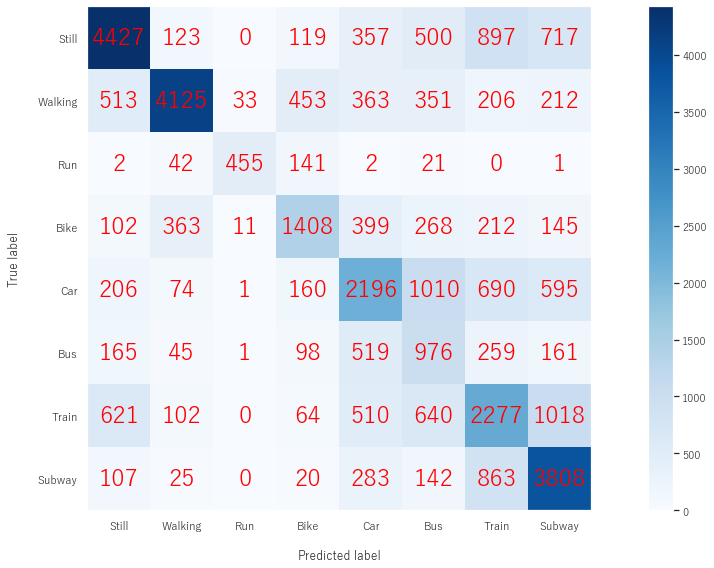

In [17]:
plot_confusion_matrix(y_test, predict, class_names, normalize=False, fontsize=24)
plt.grid(False)

f1 = f1_score(y_test, predict, average="macro")
print(predict.shape)
print("アンサンブル結果", f1)

Bag_アンサンブル結果 0.6004072473032935
Hips_アンサンブル結果 0.5787395702610396
Torso_アンサンブル結果 0.5754701518633485
Hand_アンサンブル結果 0.5167088894334178


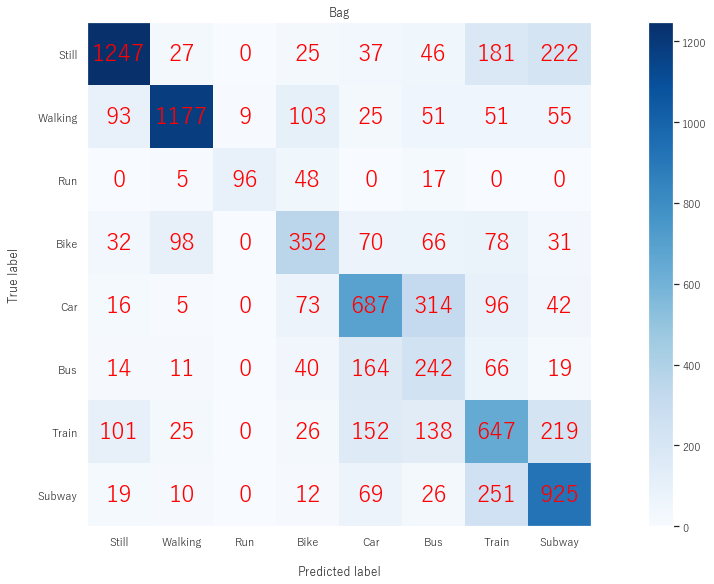

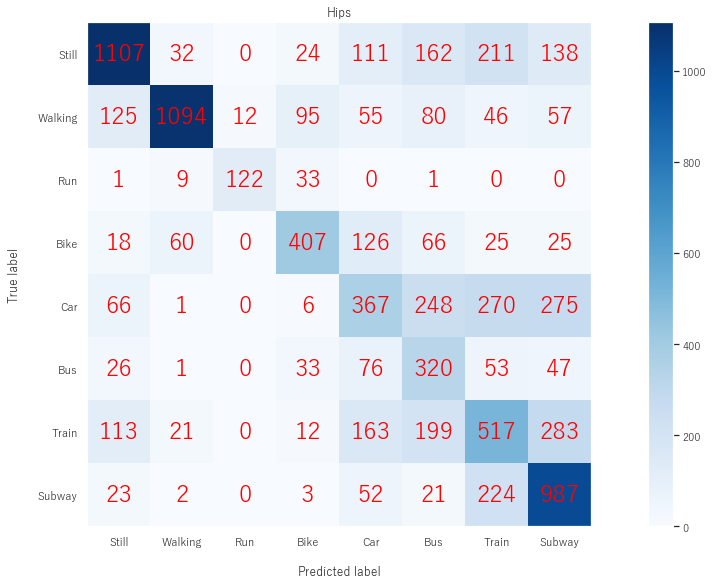

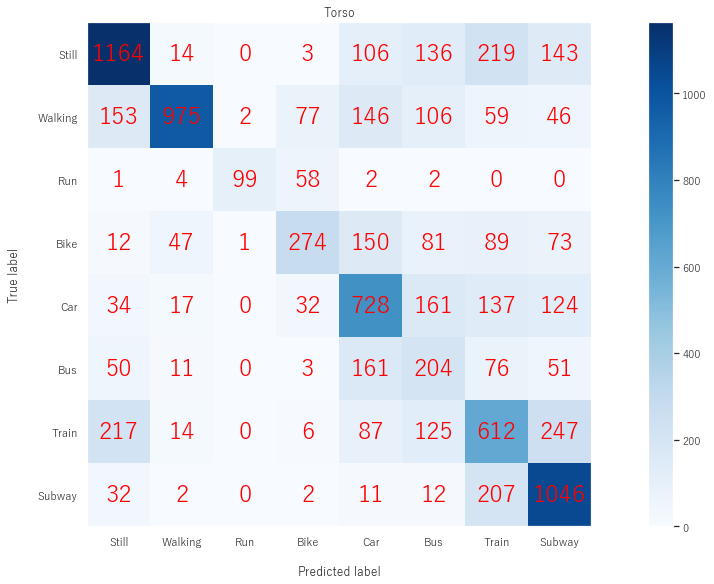

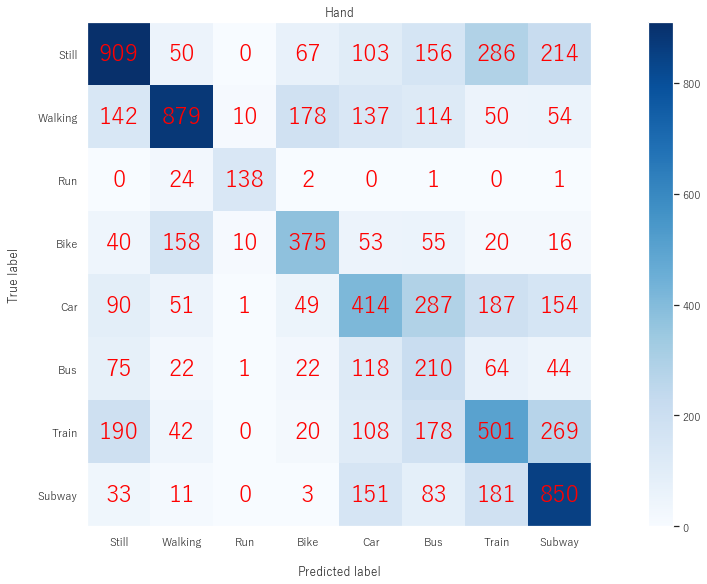

In [18]:
hold_positions = ["Bag", "Hips", "Torso", "Hand"]
for i in range(4):
    plot_confusion_matrix(y_test[y_test.shape[0]//4*i:y_test.shape[0]//4*(i+1)], predict[y_test.shape[0]//4*i:y_test.shape[0]//4*(i+1)], class_names, normalize=False, fontsize=24)
    plt.title(hold_positions[i])
    plt.grid(False)

    f1 = f1_score(y_test[y_test.shape[0]//4*i:y_test.shape[0]//4*(i+1)], predict[y_test.shape[0]//4*i:y_test.shape[0]//4*(i+1)], average="macro")
    print(hold_positions[i] + "_アンサンブル結果", f1)

## まずは、3人の出力確率をDeep Learningで学習

In [9]:
import numpy as np
import os
import random
import scipy
from scipy import signal
from numpy.fft import fft
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.initializers import he_normal
from tensorflow.python.keras.utils.vis_utils import plot_model

from sklearn.model_selection import train_test_split

import pandas as pd
import pickle

import seaborn as sns
sns.set(font='Yu Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [57]:
pattern_file = np.load("validation_pattern2.npy").reshape([-1])
names = ["安部", "熊野", "横山"]

x_train = logisticX_pattern2("train", names)
x_train = np.concatenate([x_train, logisticX_pattern2("validation", names)], axis=0)

y_train_tmp = np.delete(np.load("../../Data/センサ別npyファイル/train/train_Bag/train_Bag_Label.npy")[:, 0].reshape([-1, 1]), 120845, 0)
y_train = np.concatenate([y_train_tmp, y_train_tmp, y_train_tmp, y_train_tmp], axis=0)
y_train_tmp = np.load("../../Data/センサ別npyファイル/validation/validation_Bag/validation_Bag_Label.npy")[:, 0].reshape([-1, 1])
y_train_tmp = y_train_tmp[pattern_file == 1]
y_train = np.concatenate([y_train, y_train_tmp, y_train_tmp, y_train_tmp, y_train_tmp], axis=0)
y_train = y_train.reshape([-1, 1])

x_train = x_train.reshape([-1, 8 * len(names)])
x_train.shape, y_train.shape

(195490, 16)
(195490, 24)
(195490, 16)
(195490, 24)
(195490, 16)
(195490, 24)
(195490, 16)
(195490, 24)
(14338, 16)
(14338, 24)
(14338, 16)
(14338, 24)
(14338, 16)
(14338, 24)
(14338, 16)
(14338, 24)


((839312, 24), (839312, 1))

In [22]:
x_train = (x_train - x_train.mean(axis=0, keepdims=True)) / x_train.std(axis=0, keepdims=True)
x_train.mean(), x_train.std()

(0.00017892476, 1.0006225)

In [23]:
x_train = np.round(x_train, 5)
x_train.shape

(839312, 24)

In [26]:
y_train -= 1
np.unique(y_train)

array([0., 1., 2., 3., 4., 5., 6., 7.])

In [58]:
lr = LogisticRegression() # ロジスティック回帰モデルのインスタンスを作成
lr.fit(x_train, y_train) # ロジスティック回帰モデルの重みを学習


C:\Users\Owner\Anaconda3\envs\GPU\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Owner\Anaconda3\envs\GPU\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
names = ["安部", "熊野", "横山"]
x_test = logisticTest_pattern2("validation", names)
y_test_tmp = np.load("../../Data/センサ別npyファイル/validation/validation_Bag/validation_Bag_Label.npy")[:, 0].reshape([-1, 1])
y_test_tmp = y_test_tmp[pattern_file == 2]
y_test = np.concatenate([y_test_tmp, y_test_tmp, y_test_tmp, y_test_tmp], axis=0)
y_test = y_test.reshape([-1, 1])
x_test = x_test.reshape([-1, 8 * len(names)])

x_test.shape, y_test.shape

(8651, 16)
(8651, 24)
(8651, 16)
(8651, 24)
(8651, 16)
(8651, 24)
(8651, 16)
(8651, 24)


((34604, 24), (34604, 1))

In [60]:
train_predict = model.predict_proba(x_train)
predict = model.predict_proba(x_test)

train_predict.shape, predict.shape

((839312, 8), (34604, 8))

(34604, 8)
アンサンブル結果 0.27365958106871235


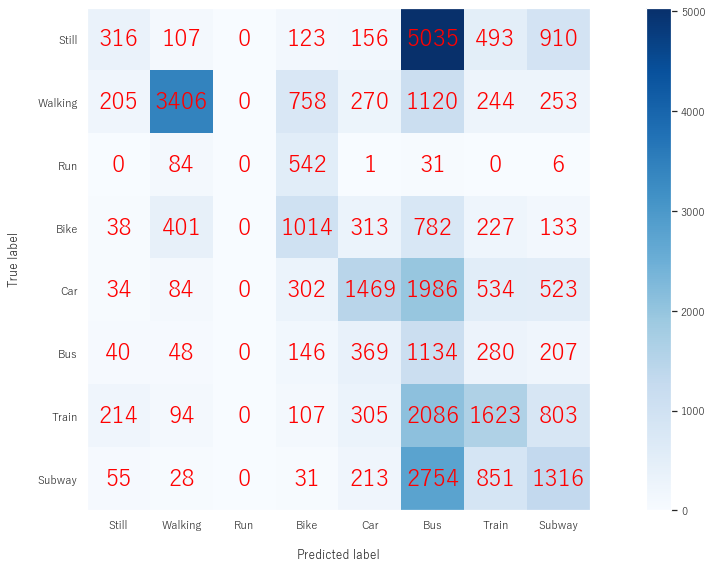

In [61]:
class_names = ["Still", "Walking", "Run", "Bike", "Car", "Bus", "Train", "Subway"]
plot_confusion_matrix(y_test-1, np.argmax(predict, axis=1), class_names, normalize=False, fontsize=24)
plt.grid(False)

f1 = f1_score(y_test-1, np.argmax(predict, axis=1), average="macro")
print(predict.shape)
print("アンサンブル結果", f1)

In [63]:
pattern_file = np.load("validation_pattern2.npy").reshape([-1])
names = ["関口"]

x_train = logisticX_pattern2("train", names)
x_train = np.concatenate([x_train, logisticX_pattern2("validation", names)], axis=0)

y_train_tmp = np.delete(np.load("../../Data/センサ別npyファイル/train/train_Bag/train_Bag_Label.npy")[:, 0].reshape([-1, 1]), 120845, 0)
y_train = np.concatenate([y_train_tmp, y_train_tmp, y_train_tmp, y_train_tmp], axis=0)
y_train_tmp = np.load("../../Data/センサ別npyファイル/validation/validation_Bag/validation_Bag_Label.npy")[:, 0].reshape([-1, 1])
y_train_tmp = y_train_tmp[pattern_file == 1]
y_train = np.concatenate([y_train, y_train_tmp, y_train_tmp, y_train_tmp, y_train_tmp], axis=0)
y_train = y_train.reshape([-1, 1])

x_train = x_train.reshape([-1, 8 * len(names)])
x_train.shape, y_train.shape

((839312, 8), (839312, 1))

In [64]:
x_train = np.concatenate([x_train, train_predict], axis=1)
x_train.shape

(839312, 16)

In [65]:
lr = LogisticRegression() # ロジスティック回帰モデルのインスタンスを作成
lr.fit(x_train, y_train) # ロジスティック回帰モデルの重みを学習


C:\Users\Owner\Anaconda3\envs\GPU\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Owner\Anaconda3\envs\GPU\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
names = ["関口"]
x_test = logisticTest_pattern2("validation", names)
y_test_tmp = np.load("../../Data/センサ別npyファイル/validation/validation_Bag/validation_Bag_Label.npy")[:, 0].reshape([-1, 1])
y_test_tmp = y_test_tmp[pattern_file == 2]
y_test = np.concatenate([y_test_tmp, y_test_tmp, y_test_tmp, y_test_tmp], axis=0)
y_test = y_test.reshape([-1, 1])
x_test = x_test.reshape([-1, 8 * len(names)])

x_test.shape, y_test.shape

((34604, 8), (34604, 1))

In [67]:
x_test = np.concatenate([x_test, predict], axis=1)
x_test.shape

(34604, 16)

In [68]:
predict = lr.predict(x_test)
print(predict)

[3. 3. 3. ... 6. 2. 1.]


(34604,)
アンサンブル結果 0.5693832516577262


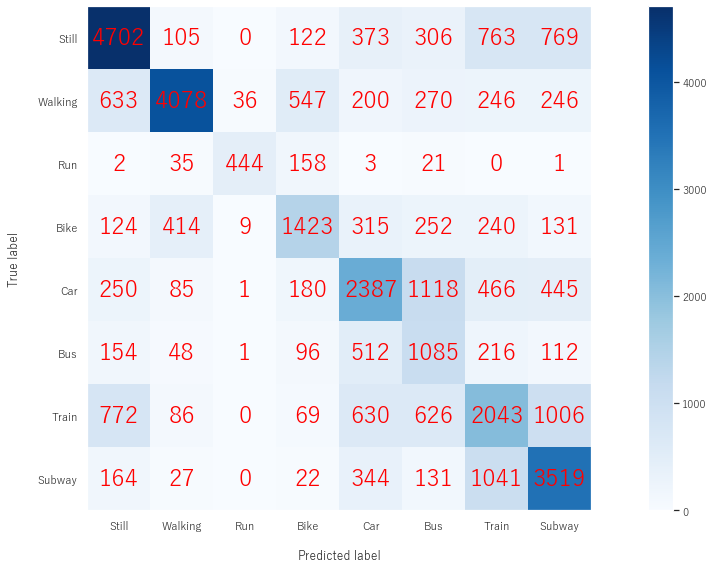

In [70]:
plot_confusion_matrix(y_test, predict, class_names, normalize=False, fontsize=24)
plt.grid(False)

f1 = f1_score(y_test, predict, average="macro")
print(predict.shape)
print("アンサンブル結果", f1)

Bag_アンサンブル結果 0.5809033288624939
Hips_アンサンブル結果 0.5804501629204127
Torso_アンサンブル結果 0.5878474110220968
Hand_アンサンブル結果 0.5178176081242939


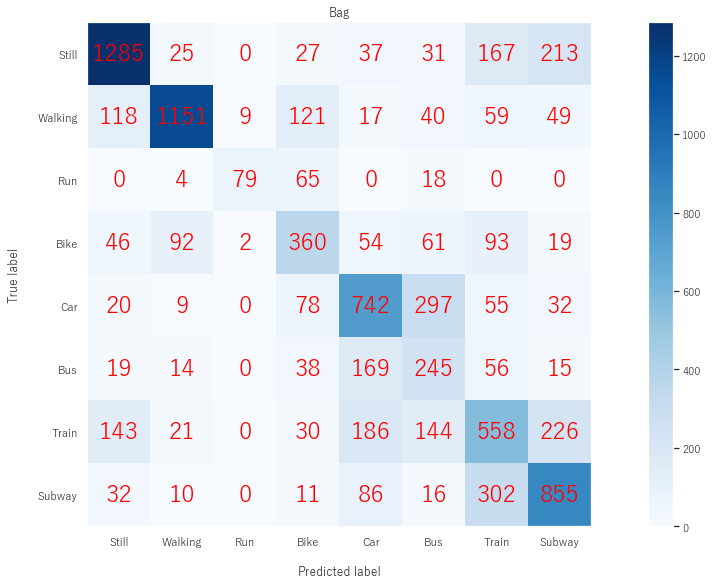

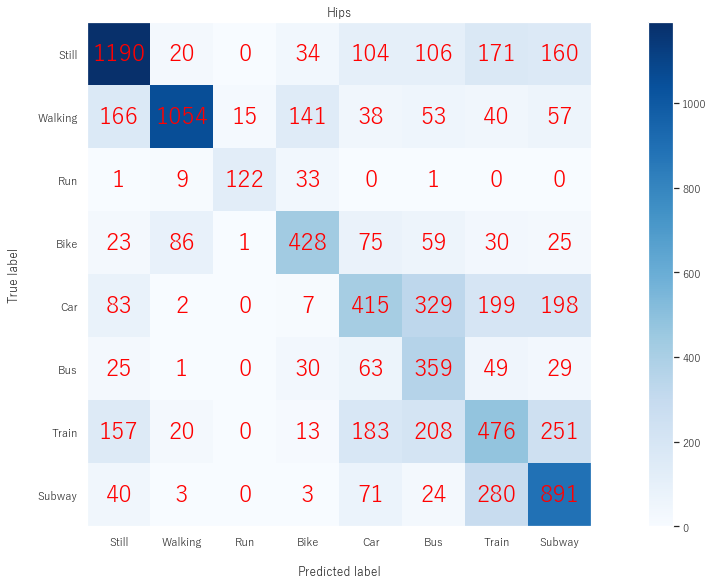

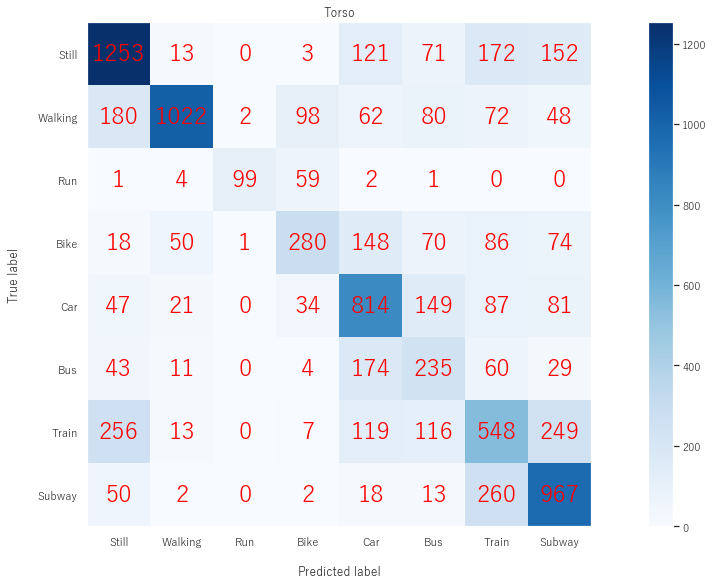

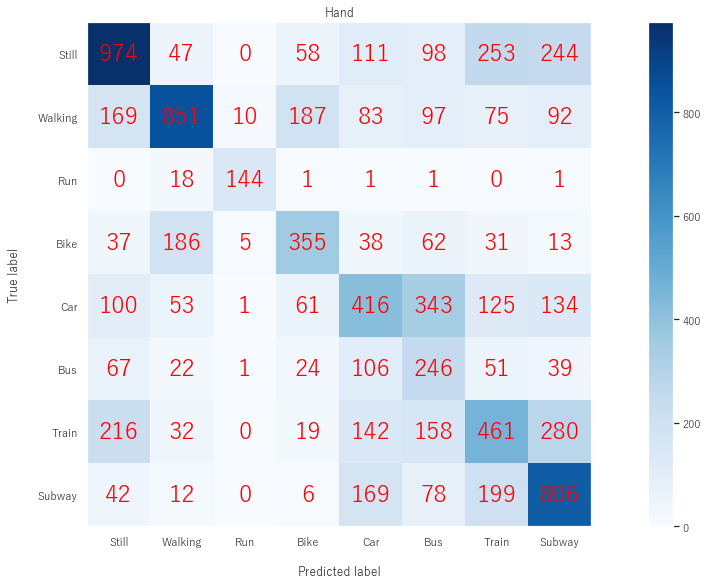

In [71]:
hold_positions = ["Bag", "Hips", "Torso", "Hand"]
for i in range(4):
    plot_confusion_matrix(y_test[y_test.shape[0]//4*i:y_test.shape[0]//4*(i+1)], predict[y_test.shape[0]//4*i:y_test.shape[0]//4*(i+1)], class_names, normalize=False, fontsize=24)
    plt.title(hold_positions[i])
    plt.grid(False)

    f1 = f1_score(y_test[y_test.shape[0]//4*i:y_test.shape[0]//4*(i+1)], predict[y_test.shape[0]//4*i:y_test.shape[0]//4*(i+1)], average="macro")
    print(hold_positions[i] + "_アンサンブル結果", f1)